In [1]:
import pandas as pd
import requests
import zipfile
import io

dfs = []
FILE_DOWNLOAD_URL = "http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/GeneratedLabelledFlows.zip"
response = requests.get(FILE_DOWNLOAD_URL)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
  # List all files in the ZIP
  print("Files in ZIP:", z.namelist())

  for file in z.namelist()[1:]:
  # Extract and read the desired CSV file
    with z.open(file) as f:
      dfs.append(pd.read_csv(f, encoding='cp1252'))

df = pd.concat(dfs, ignore_index=True)

print(df.head())

Files in ZIP: ['TrafficLabelling /', 'TrafficLabelling /Wednesday-workingHours.pcap_ISCX.csv', 'TrafficLabelling /Tuesday-WorkingHours.pcap_ISCX.csv', 'TrafficLabelling /Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'TrafficLabelling /Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'TrafficLabelling /Monday-WorkingHours.pcap_ISCX.csv', 'TrafficLabelling /Friday-WorkingHours-Morning.pcap_ISCX.csv', 'TrafficLabelling /Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'TrafficLabelling /Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv']


/tmp/ipython-input-2321396263.py:16: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(f, encoding='cp1252'))


                                  Flow ID      Source IP   Source Port  \
0  192.168.10.14-209.48.71.168-49459-80-6  192.168.10.14       49459.0   
1  192.168.10.3-192.168.10.17-389-49453-6  192.168.10.17       49453.0   
2   192.168.10.3-192.168.10.17-88-46124-6  192.168.10.17       46124.0   
3  192.168.10.3-192.168.10.17-389-49454-6  192.168.10.17       49454.0   
4   192.168.10.3-192.168.10.17-88-46126-6  192.168.10.17       46126.0   

   Destination IP   Destination Port   Protocol      Timestamp  \
0   209.48.71.168               80.0        6.0  5/7/2017 8:42   
1    192.168.10.3              389.0        6.0  5/7/2017 8:42   
2    192.168.10.3               88.0        6.0  5/7/2017 8:42   
3    192.168.10.3              389.0        6.0  5/7/2017 8:42   
4    192.168.10.3               88.0        6.0  5/7/2017 8:42   

    Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0         38308.0                 1.0                      1.0  ...   
1           479.

Beginning of PCA.

In [2]:
print(df.shape)
print(df[' Label'].value_counts())

(3119345, 85)
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack – Brute Force         1507
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [3]:
print(df.columns)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

source: https://scikit-learn.org/0.21/modules/preprocessing.html

source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

source: https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas

In [4]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np

#keep labels for later as we are about to drop all non-numeric fields
y = df[' Label']
X = df.drop(columns=[' Label'])

#eliminate infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

#eliminate non-numerical fields
X = X.select_dtypes(include=['number'])

#associate labels to remaining features
y = y[X.index]

X_scaled = preprocessing.scale(X)

pca = PCA(n_components=26)
X_pca = pca.fit_transform(X_scaled)

print("Original", X.shape)
print("Reduced", X_pca.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Original (2827876, 80)
Reduced (2827876, 26)


Plotting

source: https://matplotlib.org/stable/api/pyplot_summary.html

source: https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

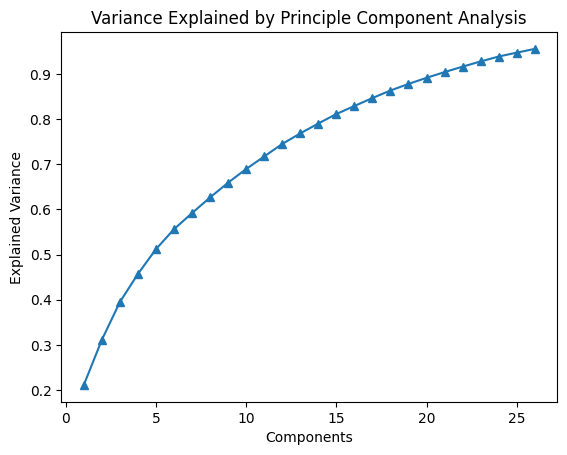

In [5]:

import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='^')
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("Variance Explained by Principle Component Analysis")
plt.show()





source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

source: https://stackoverflow.com/questions/59602819/what-do-c-and-s-mean-as-parameters-to-matplotlibs-plot-function


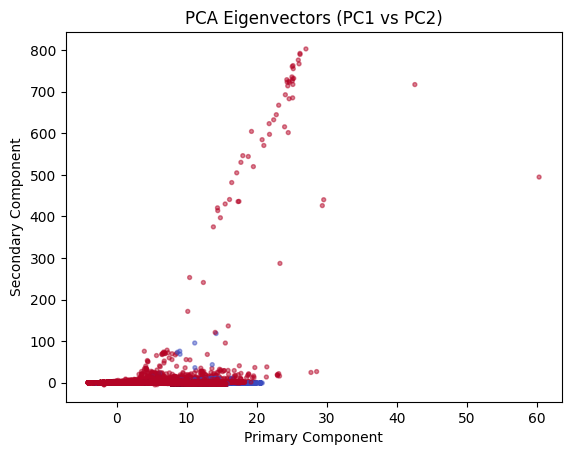

In [11]:

plt.scatter(X_pca[:,0], X_pca[:,1], c=(y=='BENIGN'), s=8, cmap='coolwarm', alpha=0.5)
plt.xlabel("Primary Component")
plt.ylabel("Secondary Component")
plt.title("PCA Eigenvectors (PC1 vs PC2)")
plt.show()

source: https://matplotlib.org/stable/users/explain/toolkits/mplot3d.html#scatter-plots

source: https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html


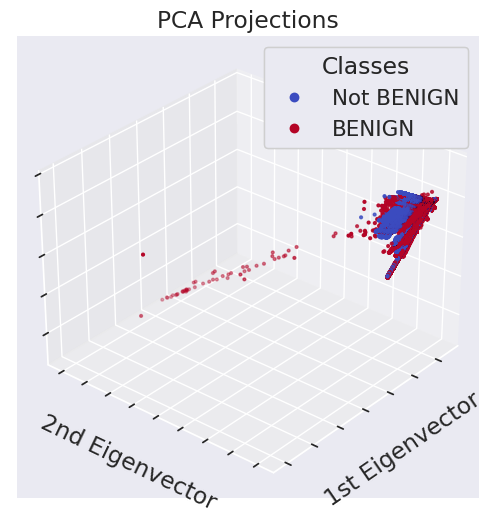

In [52]:
import mpl_toolkits.mplot3d
import numpy as np

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111, projection= "3d", elev=-150, azim=140)
scatter = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=(y=='BENIGN'),
    cmap='coolwarm',
    s=4,
)
ax.set(
    title="PCA Projections",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])


legend1 = ax.legend(
    scatter.legend_elements()[0],
    ['Not BENIGN', 'BENIGN'],
    loc="upper right",
    title="Classes"
)
ax.add_artist(legend1)
plt.show()

Model: Random Forest Classifier

source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

source: https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn

source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    454588
                       Bot       0.97      0.94      0.95       382
                      DDoS       1.00      1.00      1.00     25516
             DoS GoldenEye       0.99      0.98      0.99      2040
                  DoS Hulk       0.99      0.99      0.99     46014
          DoS Slowhttptest       0.98      0.99      0.99      1110
             DoS slowloris       1.00      0.99      0.99      1215
               FTP-Patator       1.00      1.00      1.00      1534
                Heartbleed       1.00      0.50      0.67         2
              Infiltration       1.00      0.25      0.40         4
                  PortScan       1.00      1.00      1.00     31545
               SSH-Patator       0.99      0.99      0.99      1180
  Web Attack – Brute Force       0.83      0.64      0.73       312
Web Attack – Sql Injection       0.50      0.20

Analysis: Confusion Matrix

source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

source for CM plot: Safeah (NetGuard)

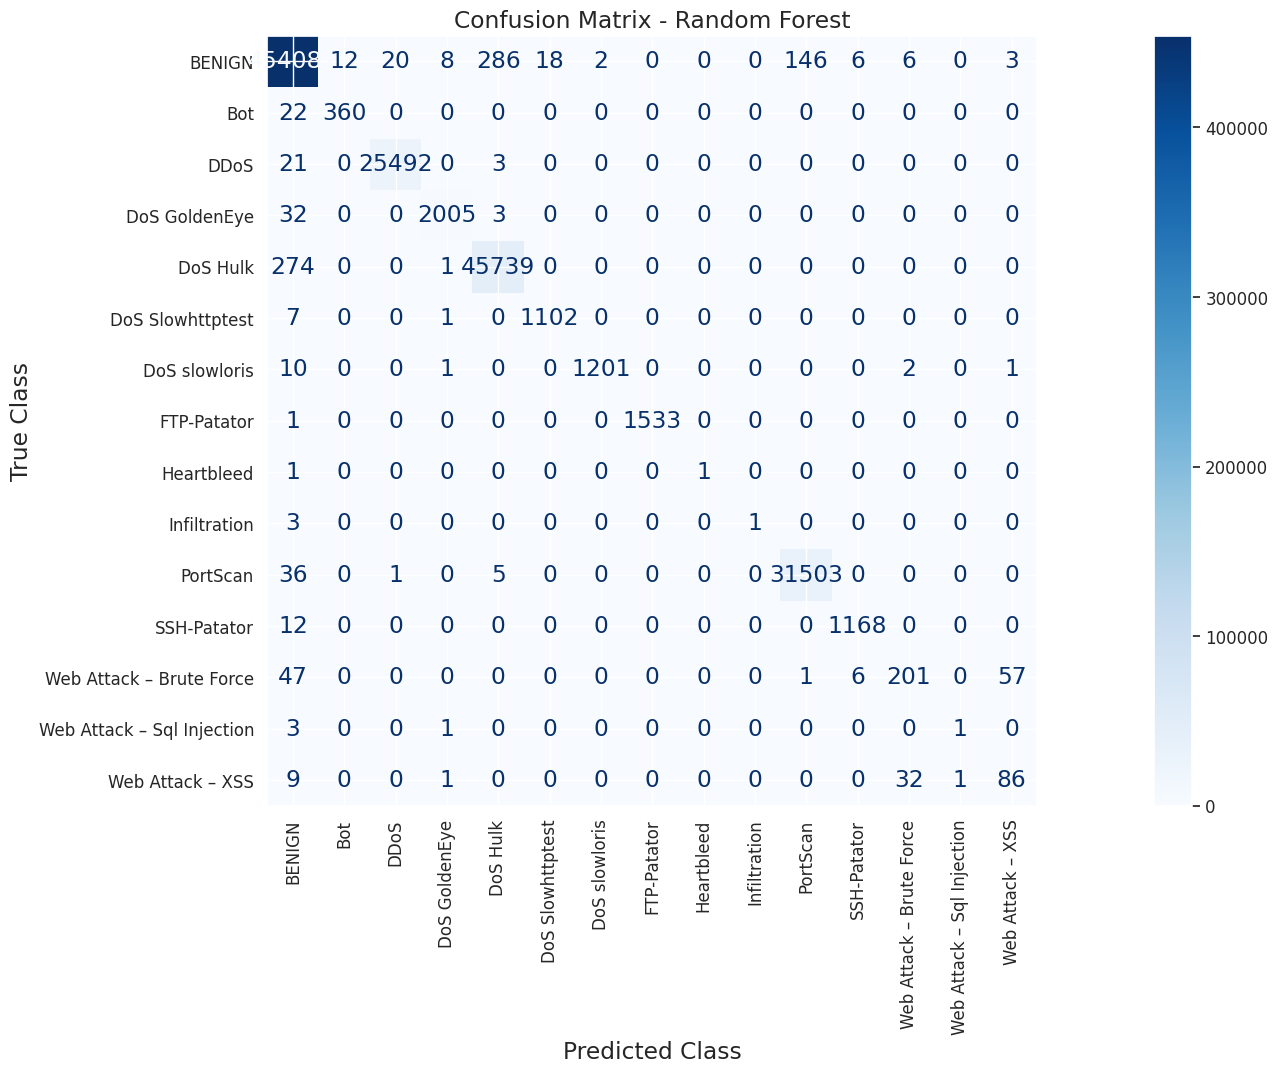

In [51]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import matplotlib

matrix = cm(y_test, y_pred)

matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

disp = cmd(matrix, display_labels=clf.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
disp.figure_.set_figwidth(30)
disp.figure_.set_figheight(10)

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()